<a href="https://colab.research.google.com/github/iiph1/229352-StatisticalLearning/blob/main/660510773_Lab06_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [3]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

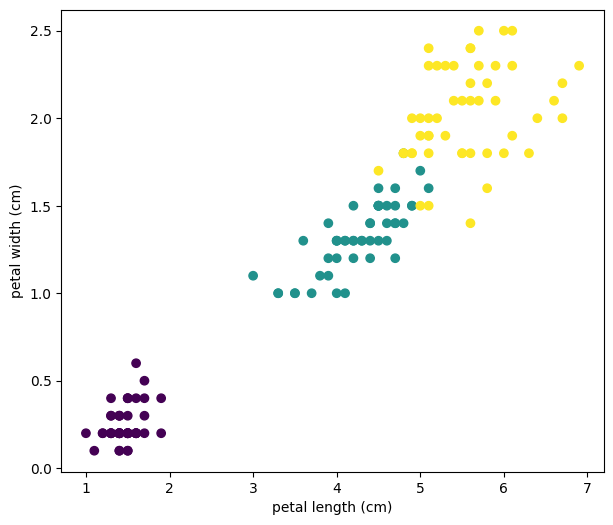

In [4]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [5]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [6]:
#TODO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

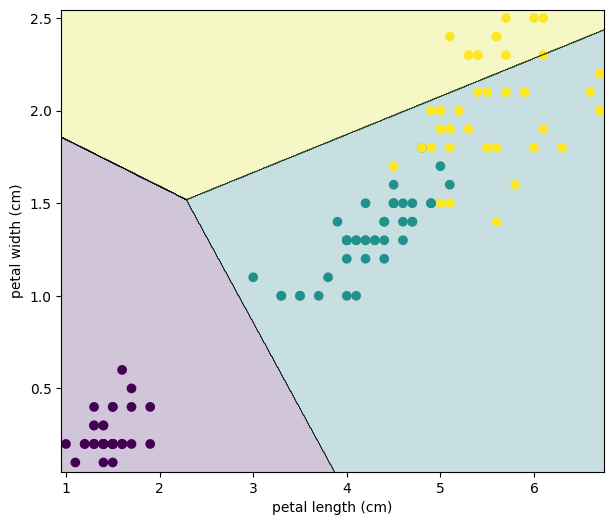

In [7]:
#TODO
linearsvc = LinearSVC(C = 0.01,loss='hinge',max_iter = 100000)
linearsvc.fit(X_train, y_train)
plot_decision_boundary(linearsvc, X_train, y_train)

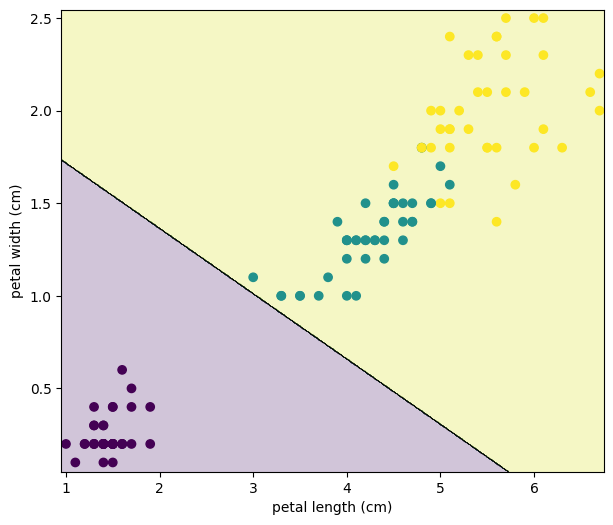

In [8]:
linearsvc = LinearSVC(C = 0.1,loss='hinge',max_iter = 100000)
linearsvc.fit(X_train, y_train)
plot_decision_boundary(linearsvc, X_train, y_train)

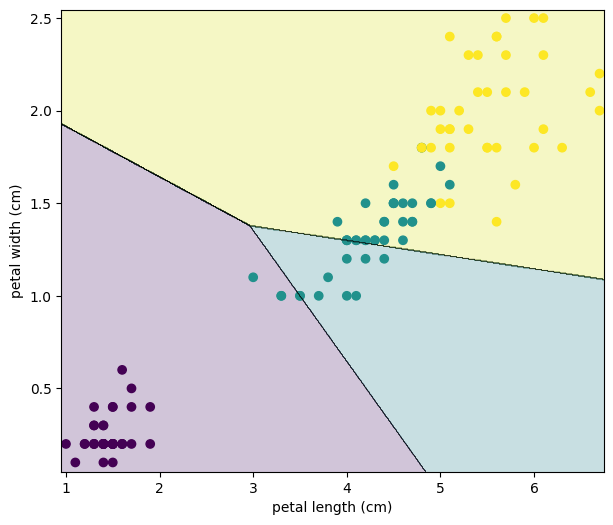

In [9]:
linearsvc = LinearSVC(C = 1.0,loss='hinge',max_iter = 100000)
linearsvc.fit(X_train, y_train)
plot_decision_boundary(linearsvc, X_train, y_train)

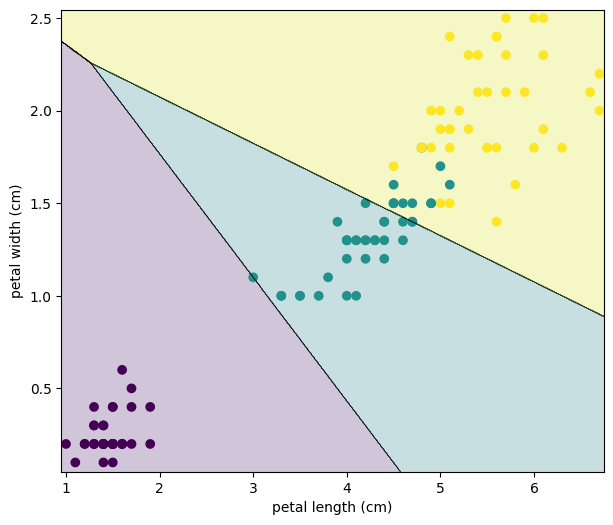

In [10]:
linearsvc = LinearSVC(C = 10.0,loss='hinge',max_iter = 100000)
linearsvc.fit(X_train, y_train)
plot_decision_boundary(linearsvc, X_train, y_train)

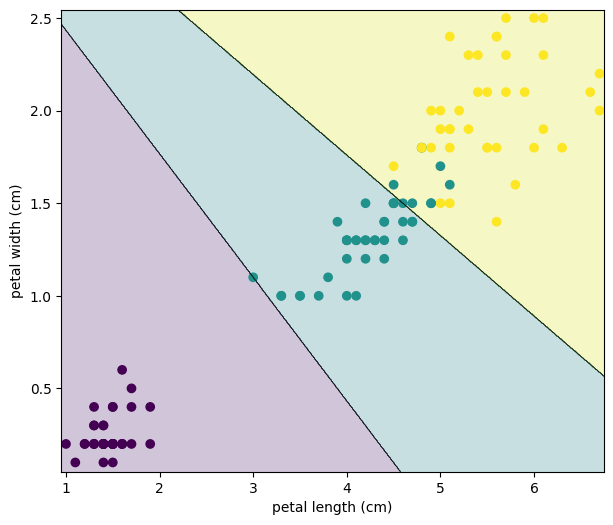

In [11]:
linearsvc = LinearSVC(C = 100.0,loss='hinge',max_iter = 100000)
linearsvc.fit(X_train, y_train)
plot_decision_boundary(linearsvc, X_train, y_train)

#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

In [12]:
#TODO
C = 1.0

linearsvc_final = LinearSVC(C=C, loss='hinge', max_iter=100000)
linearsvc_final.fit(X_train, y_train)

LinearSVC(loss='hinge', max_iter=100000)

In [20]:
from sklearn.metrics import accuracy_score

y_pred_linear = linearsvc_final.predict(X_test)
test_error_linear = 1 - accuracy_score(y_test, y_pred_linear)

print(f"Test Error for Linear SVC (C={C}): {test_error_linear:.4f}")

Test Error for Linear SVC (C=1.0): 0.1667


#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

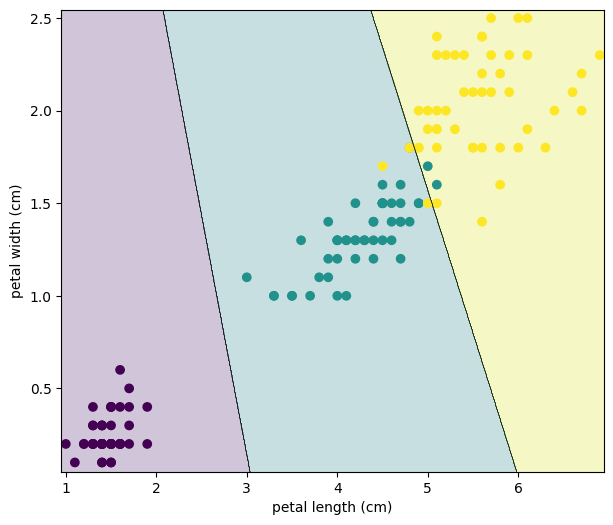

In [13]:
svc = SVC(kernel='rbf', C=1.0, gamma=0.01)
svc.fit(X, y)
plot_decision_boundary(svc, X, y)

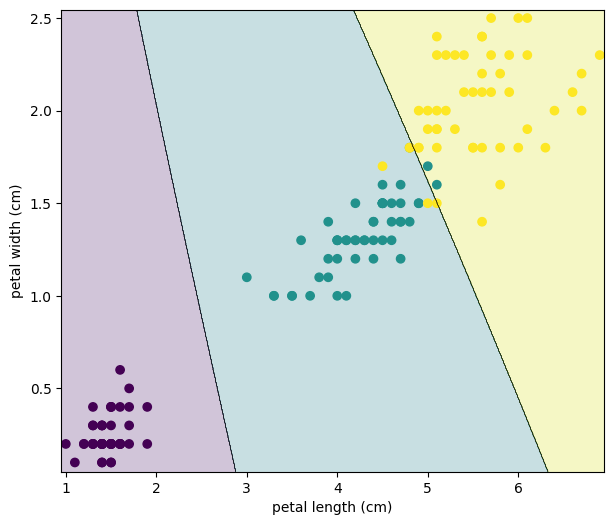

In [14]:
svc = SVC(kernel='rbf', C=1.0, gamma=0.1)
svc.fit(X, y)
plot_decision_boundary(svc, X, y)

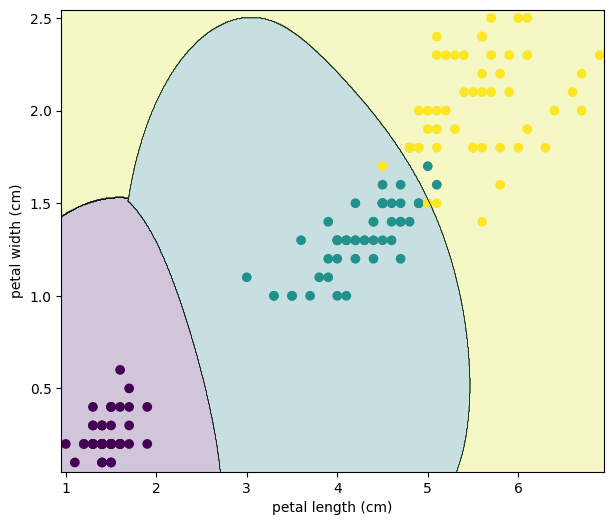

In [15]:
#TODO
svc = SVC(kernel='rbf', C=1.0, gamma=1.0)
svc.fit(X, y)
plot_decision_boundary(svc, X, y)

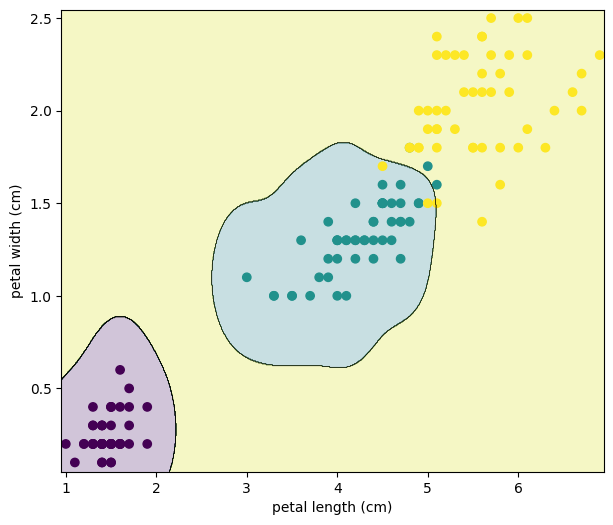

In [16]:
svc = SVC(kernel='rbf', C=1.0, gamma=10.0)
svc.fit(X, y)
plot_decision_boundary(svc, X, y)

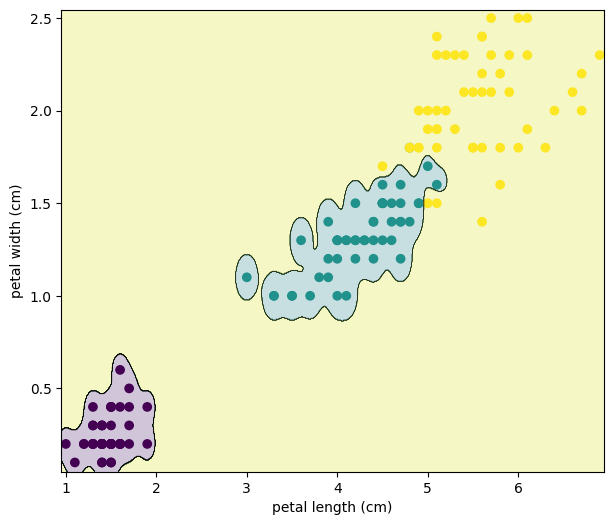

In [17]:
svc = SVC(kernel='rbf', C=1.0, gamma=100.0)
svc.fit(X, y)
plot_decision_boundary(svc, X, y)

#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

In [21]:
#TODO
gamma = 1.0

In [22]:
from sklearn.metrics import accuracy_score

gamma_val = 1.0
svc_final = SVC(kernel='rbf', C=1.0, gamma=gamma_val)
svc_final.fit(X_train, y_train)

y_pred = svc_final.predict(X_test)
test_error = 1 - accuracy_score(y_test, y_pred)
n_support_vectors = svc_final.support_vectors_.shape[0]

print(f"Test Error (gamma={gamma_val}): {test_error:.4f}")
print(f"Number of Support Vectors (gamma={gamma_val}): {n_support_vectors}")

Test Error (gamma=1.0): 0.0000
Number of Support Vectors (gamma=1.0): 30


#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

เลือก SVC เนื่องจาก ถ้าดูผล accuracy จะเห็นว่าเป็น 100% และกราฟของ SVC จะแสดงให้เห็นขอบเขตการตัดสินใจที่เป็นเส้นโค้ง ทำให้สามารถแยกข้อมูลที่มีความสัมพันธ์ที่ไม่เป็นเชิงเส้นได้ดีกว่า